# Úkol č. 4 - regrese (do 2. ledna)

  * Cílem tohoto úkolu je vyzkoušet si řešit regresní problém na reálných (ale celkem vyčištěných) datech.
  
> **Nejdůležitější na úkolu je to, abyste udělali vše procesně správně: korektní rozdělení datasetu, ladění hyperparametrů, vyhodnocení výsledků atp.**

## Dataset

  * Zdrojem dat je list *Data* v souboru `Residential-Building-Data-Set.xlsx` na course pages (originál zde: https://archive.ics.uci.edu/ml/datasets/Residential+Building+Data+Set#).
  * Popis datasetu najdete na listu *Descriptions* ve stejném souboru.
  

## Pokyny k vypracování

  1. Rozdělte data na trénovací a testovací množinu.
  1. Proveďte základní průzkum dat a příp. vyhoďte nezajímavé příznaky.
  1. Aplikujte lineární a hřebenovou regresi a výsledky řádně vyhodnoťte:
    * K měření chyby použijte `mean_absolute_error`.
    * Experimentujte s tvorbou nových příznaků (na základě těch dostupných).
    * Experimentujte se standardizací/normalizací dat.
    * Vyberte si hyperparametry modelů k ladění a najděte jejich nejlepší hodnoty.
  1. Použijte i jiný model než jen lineární a hřebenovou regresi.


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Odevzdejte pouze tento Jupyter Notebook, opravujíví by neměl nic jiného potřebovat.
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

# Řešení

## Popis sloupců

* V-1  -    Project locality defined in terms of zip codes (N/A)
* V-2  -	Total floor area of the building (m2)
* V-3  -	Lot area (m2) 
* V-4  -	Total preliminary estimated construction cost based on the prices at the beginning of the project	(10000000 IRR) 
* V-5  -	Preliminary estimated construction cost based on the prices at the beginning of the project	(10000 IRR) 
* V-6  -	Equivalent preliminary estimated construction cost based on the prices at the beginning of the project in a selected base year a (10000 IRR) 
* V-7  -	Duration of construction (As a number of time resolution)
* V-8  -	Price of the unit at the beginning of the project per m2 (10000 IRR)
* V-9  -	Actual sales prices (10000 IRR)
* V-10 - Actual construction costs (10000 IRR)
* V-11 -	The number of building permits issued (N/A)
* V-12 -	Building services index (BSI) b for a preselected base year (N/A)
* V-13 -	Wholesale price index (WPI) c of building materials for the base year (N/A)
* V-14 -	Total floor areas of building permits issued by the city/municipality (m2)
* V-15 -	Cumulative liquidity (10000000 IRR)
* V-16 -	Private sector investment in new buildings (10000000 IRR)
* V-17 -	Land price index for the base year (10000000 IRR)
* V-18 -	The number of loans extended by banks in a time resolution (N/A)
* V-19 -	The amount of loans extended by banks in a time resolution (10000000 IRR)
* V-20 -	The interest rate for loan in a time resolution (%)
* V-21 -	The average construction cost of buildings by private sector at the time of completion of construction 	(10000 IRR/m2)
* V-22 -	The average of construction cost of buildings by private sector at the beginning of the construction 	(10000 IRR/m2)
* V-23 -	Official exchange rate with respect to dollars 	(IRR)
* V-24 -	Nonofficial (street market) exchange rate with respect to dollars (IRR)
* V-25 -	Consumer price index (CPI) i in the base year (N/A)
* V-26 -	CPI of housing, water, fuel & power in the base year (N/A)
* V-27 -	Stock market index (N/A)
* V-28 -	Population of the city (N/A)
* V-29 -	Gold price per ounce (IRR)

## Nahrání datasetu

In [1]:
import pandas as pd
import numpy as np

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00437/Residential-Building-Data-Set.xlsx'
file = 'Residential-Building-Data-Set.xlsx'
data = pd.read_excel(io=url, sheet_name='Data', header=1)

In [3]:
data.head()

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,...,V-22.4,V-23.4,V-24.4,V-25.4,V-26.4,V-27.4,V-28.4,V-29.4,V-9,V-10
0,81,1,85,1,1,3150.0,920.0,598.5,190,1010.84,...,815.50,1755.00,8002.0,60.74,54.26,2978.26,41407.0,601988.1,2200,410
1,84,1,89,4,1,7600.0,1140.0,3040.0,400,963.81,...,1316.30,8364.78,8393.0,90.95,89.79,11379.37,44835.0,929027.1,5000,1000
2,78,1,81,4,1,4800.0,840.0,480.0,100,689.84,...,765.80,1755.00,4930.0,38.70,32.04,1653.06,37933.0,377828.6,1200,170
3,72,2,73,2,1,685.0,202.0,13.7,20,459.54,...,152.25,1442.31,1456.0,9.73,8.34,686.16,8194.0,122031.7,165,30
4,87,1,90,2,1,3000.0,800.0,1230.0,410,631.91,...,2244.10,9231.76,9286.0,136.60,140.20,9821.00,48260.0,1734973.5,5500,700


## Rozdělení dat na trénovací, validační a testovací

In [4]:
from sklearn.model_selection import train_test_split

X = data.copy()
X = X.drop(['V-9', 'V-10'], axis=1)
Y = data.copy()[['V-9', 'V-10']]

rd_seed = 100
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=rd_seed)

## Použití lineární regrese bez úprav dat a ladění hyperparametrů

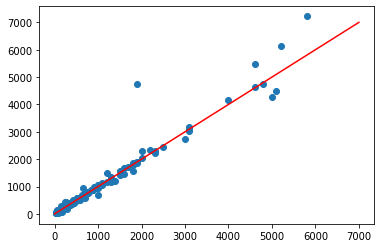

MAE: 78.19469612833764


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

lr = LinearRegression()
lr.fit(X_train, Y_train)

Y_predicted = lr.predict(X_test)
plt.scatter(Y_test, Y_predicted)
plt.plot([0,7000], [0,7000], 'r')
plt.show()

print('MAE:', (mean_absolute_error(Y_predicted, np.array(Y_test))))

## Úprava datasetu

* Zip code je zde v podstatě kategorická proměnná, která nám zde akorát škodí. Nelze usuzovat, že podobný zip code bude mít podobné výstupní hodnoty. Abychom tento problém vyřešili, ale zároveň nějak naložili se zip codem, který sám o sobě je docela dobrá informace, provedeme one hot encoding.

In [6]:
X = data.copy()
zip_code_dummies = pd.get_dummies(X['V-1'])
X = pd.concat([X.drop('V-1', axis=1), zip_code_dummies], axis=1)

* Sloupce V-11 až V-29 jsou zde několikrát. Důvodem je zaznamenání údajů v různých fázích projektu. Můžeme to tak nechat být a brát je jako různé příznaky, nebo s touto skutečností můžeme experimentovat třeba sloučením těchto sloupců do jednoho, například jako průměr jejich hodnot.

In [7]:
def mean_timelags(row, v):
    V = 'V-' + str(v)
    s = row[V]
    for i in range(1,5):
        s += row[V + "." + str(i)]
    return s/5

for i in range(11, 30):
    X['V-' + str(i)] = X.apply (lambda row: mean_timelags(row, i), axis=1)
    for j in range(1, 5):
        X = X.drop('V-' + str(i) + "." + str(j), axis=1)

## Příznaky
* Všechny příznaky jsou rozhodně zajímavé a užitečné. Určitě by se mezi některými z nich dala najít korelace, která je u lineární regrese nežádoucí. Nicméně zkusíme ponechat všechny příznaky.

## Standardizace, Normalizace

* Pro linární/hřebenovou regresi si standardizací nepomůžeme a normalizace není tak užitečná/efektivní jako pro jiné modely strojového učení. Přesto zkusíme normalizovat. Použijeme MinMaxScaler.

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
idx = X.index
cols = X.columns
X_minmax = pd.DataFrame(scaler.fit_transform(X), index=idx, columns=cols)

## Použití lineární regrese na upravených datech
* U lineární regrese pomoci metody nejmenších čtverců nebudeme ladit hyperparametry, protože nemáme žádné

In [9]:
X_minmax = X_minmax.drop(['V-9', 'V-10'], axis=1)
Y_minmax = data.copy()[['V-9', 'V-10']]

rd_seed = 170
X_train, X_test, Y_train, Y_test = train_test_split(X_minmax, Y_minmax, test_size=0.25, random_state=rd_seed)

MAE: 62.40818212365592


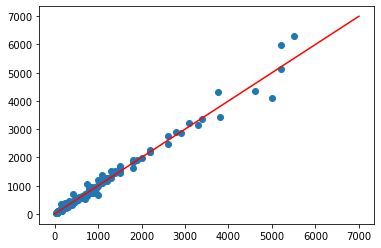

In [10]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

Y_predicted = lr.predict(X_test)
print('MAE:', (mean_absolute_error(Y_predicted, np.array(Y_test))))
plt.scatter(Y_test, Y_predicted)
plt.plot([0,7000], [0,7000], 'r')
plt.show()

## Použití hřebenové regrese na upravených datech
* Použijeme stejné úpravy jako pro lineární regresi, tedy použijeme už připravená data.
* Snažíme se najít optimální hodnotu parametru alfa - chápeme jako ladění hyperparametru

Optimal alpha 0.03705389679131671
MAE: 60.479587199233876


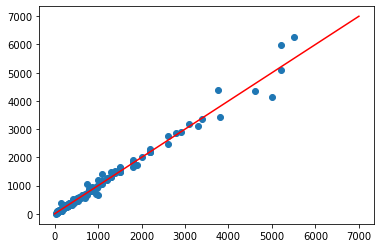

In [11]:
from sklearn.linear_model import Ridge
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from scipy import optimize

def get_ridge_model(X, Y):
    
    def ridgemodel(alpha):
        model = Ridge(alpha=alpha)
        return -np.mean(cross_val_score(model, X, Y, cv=5, scoring='neg_mean_absolute_error'))

    opt_alpha = optimize.minimize_scalar(ridgemodel, options = {'maxiter': 50}, method = 'bounded', bounds=(0.01, 100))
    print('Optimal alpha', opt_alpha.x)
    model = Ridge(alpha = opt_alpha.x)
    model.fit(X,Y)
    return model

r_model = get_ridge_model(X_train, Y_train)

Yth = r_model.predict(X_test)
plt.scatter(Y_test, Yth)
plt.plot([0,7000], [0,7000], 'r')

print('MAE:', mean_absolute_error(Yth, np.array(Y_test)))

## Random Forest Regressor
* Stromové struktury není třeba nestandardizujeme ani nenormalizujeme
* Máme na výběr spoustu hyperparametrů na trénování, důležité je nepřepálit počet hodnot a parametrů, abychom vůbec dostali výsledky (zde pouze n_estimators, max_depth)

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

X_rf = X.drop(['V-9', 'V-10'], axis=1)
Y_rf = data.copy()[['V-9', 'V-10']]

X_train, X_test, Y_train, Y_test = train_test_split(X_rf, Y_rf, test_size=0.25, random_state=rd_seed)

rf = RandomForestRegressor()

parameters = {
    'n_estimators': range(1,100,5),
    'max_depth': range(1,10),
    'random_state': [rd_seed] # for tuning purposes
#     'max_features': ['log2', 'sqrt','auto'],
#     'min_samples_split': [2, 3, 5],
#     'min_samples_leaf': [1, 5, 8]
}

grid_obj = GridSearchCV(rf, parameters, scoring='neg_mean_absolute_error', cv=5, iid=False, error_score='raise')
grid_obj = grid_obj.fit(X_train, Y_train)

rf = grid_obj.best_estimator_
rf.fit(X_train, Y_train)

Y_predicted = rf.predict(X_test)
print('Best params:', grid_obj.best_params_)
print('MAE:', (mean_absolute_error(Y_predicted, np.array(Y_test))))

Best params: {'max_depth': 9, 'n_estimators': 61, 'random_state': 170}
MAE: 84.36183044857718


## Výsledky, závěr

* Je vidět, že is mírnými úpravami datasetu, jako je zprůměrování sloupců a one hot encoding u zip code, jsem snížili MAE o pár desítek. Standardizace u lineární a hřebenové regrese nám pomoci nemůže a normalizace sice ano, ale opravdu jen minimálně. Dále jsem si zkusil pohrát s vyhazováním neužitečných příznaků (mimo), ale to se mi nijak neosvědčilo. Lineární a hřebenová regrese (MAE lehce nad 60) dává mnohem lepší výsledky oproti Random Forest regresi (MAE nad 80). Co se týče ohledně lineární vs. hřebenové regrese, hřebenová dává jen nepatrně lepší výsledky. Bylo ale důležité zvolit/natrénovat správnou alfu.